Corr√©lations Mid historique ‚Üí mates_mean selon la taille de la fen√™tre :
Fen√™tre 1 parties pr√©c√©dentes : Corr√©lation = 0.160
Fen√™tre 2 parties pr√©c√©dentes : Corr√©lation = 0.181
Fen√™tre 3 parties pr√©c√©dentes : Corr√©lation = 0.126
Fen√™tre 4 parties pr√©c√©dentes : Corr√©lation = 0.161
Fen√™tre 5 parties pr√©c√©dentes : Corr√©lation = 0.139
Fen√™tre 6 parties pr√©c√©dentes : Corr√©lation = 0.227
Fen√™tre 7 parties pr√©c√©dentes : Corr√©lation = 0.238
Fen√™tre 8 parties pr√©c√©dentes : Corr√©lation = 0.228
Fen√™tre 9 parties pr√©c√©dentes : Corr√©lation = 0.205


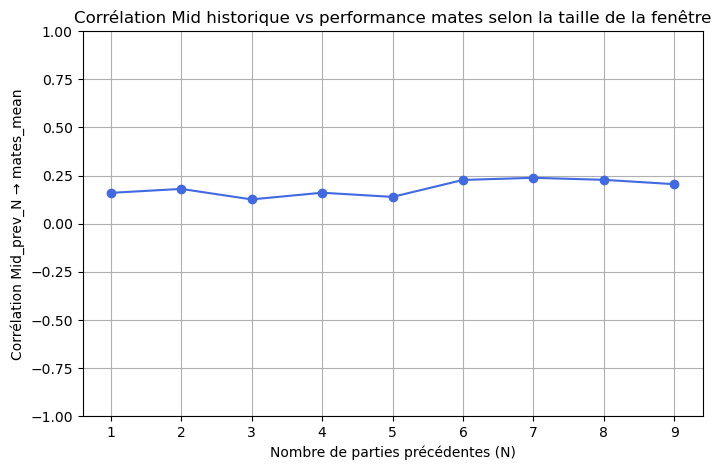


La fen√™tre la plus significative est 7 parties pr√©c√©dentes avec une corr√©lation de 0.238


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


# Charger le CSV
df = pd.read_csv("data.csv")

# Colonnes
my_role = 'Mid'
other_roles = ['Top', 'Jungle', 'Bot']

# Moyenne des mates pour chaque partie
df['mates_mean'] = df[other_roles].mean(axis=1)

# Fen√™tres √† tester
max_window = 9
window_results = {}

for window in range(1, max_window + 1):
    # Moyenne glissante du Mid sur les N parties pr√©c√©dentes
    df[f'Mid_prev_{window}'] = df[my_role].shift(1).rolling(window=window).mean()
    
    # Supprimer les lignes NA
    valid_df = df.dropna(subset=[f'Mid_prev_{window}', 'mates_mean'])
    
    # Calcul de la corr√©lation
    corr = valid_df[f'Mid_prev_{window}'].corr(valid_df['mates_mean'])
    window_results[window] = corr

# Afficher les r√©sultats
print("Corr√©lations Mid historique ‚Üí mates_mean selon la taille de la fen√™tre :")
for window, corr in window_results.items():
    print(f"Fen√™tre {window} parties pr√©c√©dentes : Corr√©lation = {corr:.3f}")

# Visualiser la corr√©lation selon la fen√™tre
plt.figure(figsize=(8,5))
plt.plot(list(window_results.keys()), list(window_results.values()), marker='o', color='royalblue')
plt.title("Corr√©lation Mid historique vs performance mates selon la taille de la fen√™tre")
plt.xlabel("Nombre de parties pr√©c√©dentes (N)")
plt.ylabel("Corr√©lation Mid_prev_N ‚Üí mates_mean")
plt.ylim(-1,1)
plt.grid(True)
plt.show()

# Identifier la fen√™tre la plus significative (corr√©lation absolue maximale)
best_window = max(window_results, key=lambda k: abs(window_results[k]))
print(f"\nLa fen√™tre la plus significative est {best_window} parties pr√©c√©dentes avec une corr√©lation de {window_results[best_window]:.3f}")


In [2]:
df['Mid_prev_7'] = df['Mid'].shift(1).rolling(window=7).mean()

df['Mid_prev_7_cat'] = pd.cut(df['Mid_prev_7'], bins=[-np.inf, -0.3, 0.3, np.inf],
                              labels=['mauvais', 'neutre', 'bon'])


In [3]:
mates_by_cat = df.groupby('Mid_prev_7_cat')['mates_mean'].mean()
mates_by_cat_std = df.groupby('Mid_prev_7_cat')['mates_mean'].std()

print("Performance moyenne des mates selon cat√©gorie Mid_prev_7 :")
print(mates_by_cat)

Performance moyenne des mates selon cat√©gorie Mid_prev_7 :
Mid_prev_7_cat
mauvais   -3.333333e-01
neutre    -1.851852e-01
bon        9.796086e-18
Name: mates_mean, dtype: float64


C:\Users\Rafael\AppData\Local\Temp\ipykernel_7388\3208794971.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mates_by_cat = df.groupby('Mid_prev_7_cat')['mates_mean'].mean()
C:\Users\Rafael\AppData\Local\Temp\ipykernel_7388\3208794971.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mates_by_cat_std = df.groupby('Mid_prev_7_cat')['mates_mean'].std()


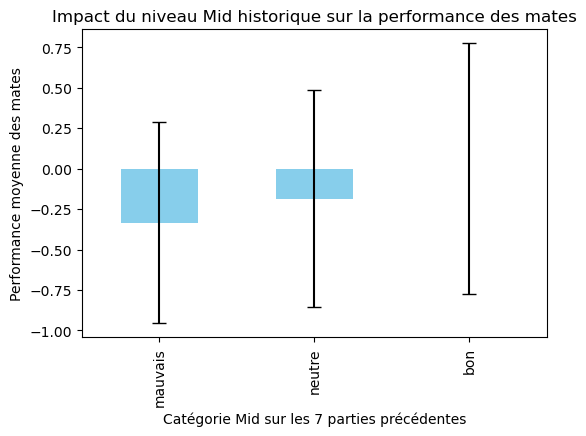

In [4]:
plt.figure(figsize=(6,4))
mates_by_cat.plot(kind='bar', yerr=mates_by_cat_std, color='skyblue', capsize=5)
plt.ylabel("Performance moyenne des mates")
plt.xlabel("Cat√©gorie Mid sur les 7 parties pr√©c√©dentes")
plt.title("Impact du niveau Mid historique sur la performance des mates")
plt.show()


In [5]:
df

Top  Jungle  Mid  Bot  Gold @10  R  mates_mean  Mid_prev_1  Mid_prev_2  \
0    -1       0  1.0   -1       800  1   -0.666667         NaN         NaN   
1     1       1  1.0    1      4500  1    1.000000         1.0         NaN   
2    -1       0 -1.0   -1       950 -1   -0.666667         1.0         1.0   
3    -1       1  1.0   -1      -350  1   -0.333333        -1.0         0.0   
4     1      -1  1.0   -1      2000  1   -0.333333         1.0         0.0   
5     0      -1  1.0    1       700  1    0.000000         1.0         1.0   
6     1       0  1.0    0      1600  1    0.333333         1.0         1.0   
7     1       1  1.0    1      4500  1    1.000000         1.0         1.0   
8     0      -1  1.0    0      1500  1   -0.333333         1.0         1.0   
9    -1      -1  1.0    0     -2100 -1   -0.666667         1.0         1.0   
10   -1       0  1.0    1       700  1    0.000000         1.0         1.0   
11   -1       0  1.0    1      -600  1    0.000000         1.0         1.0   
12   -1       0  1.0    0         0  1   -0.333333         1.0         1.0   
13    1       1  1.0    1      3600  1    1.000000         1.0         1.0   
14    1       1 -1.0    1      2800  1    1.000000         1.0         1.0   
15   -1      -1  1.0    0     -6800 -1   -0.666667        -1.0         0.0   
16   -1      -1 -1.0   -1     -1700 -1   -1.000000         1.0         0.0   
17    1       1 -1.0    1      2800  1    1.000000        -1.0         0.0   
18   -1      -1 -1.0   -1     -2230 -1   -1.000000        -1.0        -1.0   
19   -1       1  1.0    1      1800  1    0.333333        -1.0        -1.0   
20   -1      -1 -1.0   -1     -5200 -1   -1.000000         1.0         0.0   
21    0      -1  1.0    1      3300  1    0.000000        -1.0         0.0   
22   -1       1  1.0   -1      1900  1   -0.333333         1.0         0.0   
23    0       0  1.0    0       335  1    0.000000         1.0         1.0   
24   -1       1  1.0    1       500  1    0.333333         1.0         1.0   
25   -1      -1 -1.0    0     -2000  1   -0.666667         1.0         1.0   
26   -1      -1  1.0    0      -100  1   -0.666667        -1.0         0.0   
27   -1      -1 -2.0   -1       100 -1   -1.000000         1.0         0.0   
28   -1      -1 -2.0   -1      -600 -1   -1.000000        -2.0        -0.5   
29    1       1 -2.0    0      1900  1    0.666667        -2.0        -2.0   
30   -1      -1  1.0   -1      1600 -1   -1.000000        -2.0        -2.0   
31    0       1 -2.0    0     -1300  1    0.333333         1.0        -0.5   
32   -1       1 -1.0    0      1200 -1    0.000000        -2.0        -0.5   
33   -1      -1  NaN   -1     -3800 -1   -1.000000        -1.0        -1.5   
34    1      -1  1.0   -1     -2700  1   -0.333333         NaN         NaN   
35    1       1  1.0    1      3100  1    1.000000         1.0         NaN   
36   -1      -1  1.0    1      2200  1   -0.333333         1.0         1.0   
37   -1      -1  1.0   -1     -3100 -1   -1.000000         1.0         1.0   
38    0       0  1.0    1       100  1    0.333333         1.0         1.0   
39   -1      -1 -1.0   -1      -300 -1   -1.000000         1.0         1.0   
40    0       0  1.0    0      -500  1    0.000000        -1.0         0.0   
41    1       0  1.0    1      1600  1    0.666667         1.0         0.0   
42    1       1 -1.0    1      3200  1    1.000000         1.0         1.0   
43   -1       1 -1.0   -1      -400  1   -0.333333        -1.0         0.0   
44   -1       1  1.0    1      2500  1    0.333333        -1.0        -1.0   

    Mid_prev_3  Mid_prev_4  Mid_prev_5  Mid_prev_6  Mid_prev_7  Mid_prev_8  \
0          NaN         NaN         NaN         NaN         NaN         NaN   
1          NaN         NaN         NaN         NaN         NaN         NaN   
2          NaN         NaN         NaN         NaN         NaN         NaN   
3     0.333333         NaN         NaN         NaN         NaN         NaN   
4     0.333333        0.5

(merci chatgpt)

# Interpr√©tation des r√©sultats

## Cat√©gorie ¬´ mauvais ¬ª (-0.333)
Quand ton niveau Mid sur les 7 parties pr√©c√©dentes est plut√¥t faible, la moyenne des performances de tes co√©quipiers sur la partie suivante tend √† √™tre **n√©gative**.  
Cela sugg√®re que jouer mal sur la s√©rie pr√©c√©dente pourrait √™tre associ√© √† des co√©quipiers moins performants.

## Cat√©gorie ¬´ neutre ¬ª (-0.185)
Quand ton niveau Mid est moyen, la moyenne des co√©quipiers est l√©g√®rement n√©gative, mais moins que pour la cat√©gorie ¬´ mauvais ¬ª.  
Tes co√©quipiers ne sont pas aussi impact√©s que dans le sc√©nario ¬´ mauvais ¬ª.

## Cat√©gorie ¬´ bon ¬ª (~0)
Quand ton niveau Mid est bon sur les 7 parties pr√©c√©dentes, la moyenne des mates est proche de z√©ro.  
Cela signifie qu‚Äôun bon Mid ne cr√©e pas de co√©quipiers ¬´ n√©gatifs ¬ª et peut √™tre associ√© √† des mates plus √©quilibr√©s ou l√©g√®rement meilleurs.

---

## Conclusions principales

- **Impact moyen** : Plus ton Mid est faible sur les 7 parties pr√©c√©dentes, plus il semble que tes co√©quipiers aient tendance √† moins bien jouer.
- **Fen√™tre de 7 parties** : La corr√©lation que tu as calcul√©e pr√©c√©demment montre que cette p√©riode est celle o√π ton niveau Mid influence le plus tes co√©quipiers.
- **Bonnes performances pass√©es** : Elles n‚Äôaugmentent pas drastiquement la performance des mates, mais elles emp√™chent un effet n√©gatif.

üí° **Remarque** : la moyenne ¬´ bon ¬ª proche de 0 sugg√®re un **plafond d‚Äôeffet** ‚Äî ton niveau Mid peut r√©duire l‚Äôimpact n√©gatif mais n‚Äôaugmente pas √©norm√©ment la performance des co√©quipiers.


Impact de la performance mid relative aux performances des autres joueurs

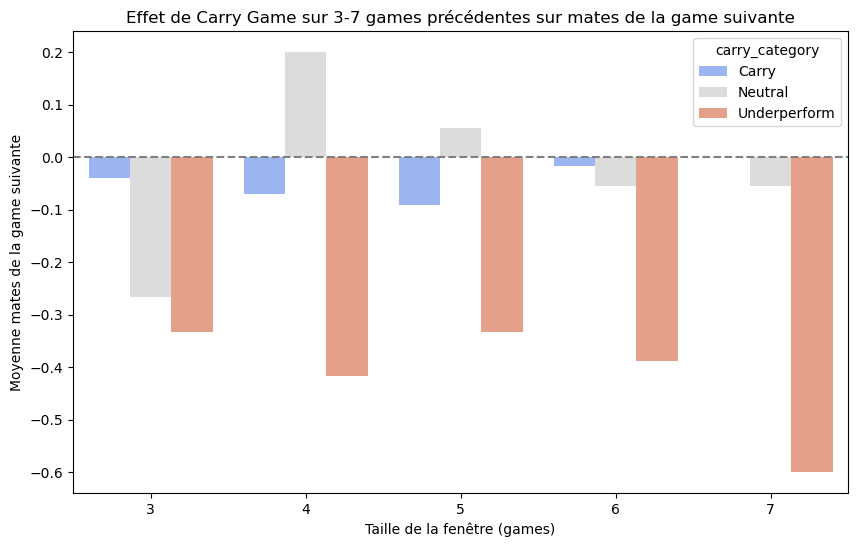

In [24]:
# 1Ô∏è‚É£ Calculer la surperformance relative
df['relative_perf'] = df['Mid'] - df['mates_mean']

# 2Ô∏è‚É£ D√©caler mates_mean pour regarder la game suivante
df['mates_next'] = df['mates_mean'].shift(-1)

# 3Ô∏è‚É£ Fonction pour calculer rolling moyenne et cat√©goriser Carry Game
def categorize_carry(df, window):
    col_name = f'relative_perf_roll{window}'
    df[col_name] = df['relative_perf'].rolling(window=window, min_periods=window).mean()
    
    # Cat√©goriser la rolling perf
    def carry_cat(x):
        if x > 0.2:   # seuil arbitraire pour consid√©rer une surperformance
            return 'Carry'
        elif x < -0.2:
            return 'Underperform'
        else:
            return 'Neutral'
    
    df[f'carry_cat_{window}'] = df[col_name].apply(lambda x: carry_cat(x) if not pd.isna(x) else np.nan)
    return df

# 4Ô∏è‚É£ Appliquer pour fen√™tres de 3 √† 7 games
for w in range(3,8):
    df = categorize_carry(df, w)

# 5Ô∏è‚É£ Reformater les r√©sultats pour long format
long_results = []

for w in range(3,8):
    col_roll = f'relative_perf_roll{w}'
    cat_col = f'carry_cat_{w}'
    df_valid = df.dropna(subset=[col_roll, 'mates_next'])
    
    summary = df_valid.groupby(cat_col).agg(
        mean_relative_perf=(col_roll,'mean'),
        mean_mates_next=('mates_next','mean'),
        count=('mates_next','count')
    ).reset_index()
    summary['window'] = w
    summary = summary.rename(columns={cat_col:'carry_category'})
    long_results.append(summary)

long_summary_df = pd.concat(long_results, ignore_index=True)

# 6Ô∏è‚É£ Visualisation
plt.figure(figsize=(10,6))
sns.barplot(data=long_summary_df, x='window', y='mean_mates_next', hue='carry_category', palette='coolwarm')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Effet de Carry Game sur 3-7 games pr√©c√©dentes sur mates de la game suivante')
plt.xlabel('Taille de la fen√™tre (games)')
plt.ylabel('Moyenne mates de la game suivante')
plt.show()